In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import json
import random
import scipy
import sklearn
import string
from sklearn import linear_model

In [1]:
pip install ucimlrepo

^C
ERROR: Operation cancelled by user

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
connect_4 = fetch_ucirepo(id=26) 
  
# data (as pandas dataframes) 
X = connect_4.data.features 
y = connect_4.data.targets 
  
# metadata 
print(connect_4.metadata) 
  
# variable information 
print(connect_4.variables) 

{'uci_id': 26, 'name': 'Connect-4', 'repository_url': 'https://archive.ics.uci.edu/dataset/26/connect+4', 'data_url': 'https://archive.ics.uci.edu/static/public/26/data.csv', 'abstract': 'Contains connect-4 positions', 'area': 'Games', 'tasks': ['Classification'], 'characteristics': ['Multivariate', 'Spatial'], 'num_instances': 67557, 'num_features': 42, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1995, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C59P43', 'creators': ['John Tromp'], 'intro_paper': None, 'additional_info': {'summary': 'This database contains all legal 8-ply positions in the game of connect-4 in which neither player has won yet, and in which the next move is not forced.\r\n\r\nx is the first player; o the second.\r\n\r\nThe outcome class is the game theoretical value for the first player.', 'purpose': None, 'funded_b

In [3]:
X

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f3,f4,f5,f6,g1,g2,g3,g4,g5,g6
0,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,b
1,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,b
2,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,b
3,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,b
4,o,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67552,x,x,b,b,b,b,o,x,o,b,...,b,b,b,b,o,o,x,b,b,b
67553,x,x,b,b,b,b,o,b,b,b,...,b,b,b,b,o,x,o,o,x,b
67554,x,x,b,b,b,b,o,o,b,b,...,b,b,b,b,o,x,x,o,b,b
67555,x,o,b,b,b,b,o,b,b,b,...,b,b,b,b,o,x,o,x,x,b


In [4]:
connect4_data = X
connect4_data['outcome'] = y['class']

In [5]:
count = (connect4_data['outcome'] == 'draw').sum()
count

6449

In [7]:
connect4_data['Count_of_turns'] = connect4_data.apply(lambda row: ((row == 'x') | (row == 'o')).sum(), axis=1)

KeyboardInterrupt: 

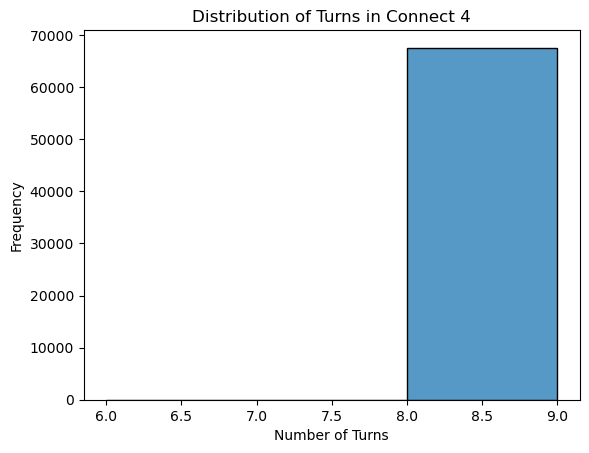

In [62]:
import seaborn as sns

# Plot distribution
sns.histplot(connect4_data['Count_of_turns'], bins=range(connect4_data['Count_of_turns'].min()-2, connect4_data['Count_of_turns'].max() + 2), kde=False)

# Add labels and title
plt.xlabel('Number of Turns')
plt.ylabel('Frequency')
plt.title('Distribution of Turns in Connect 4')

# Show the plot
plt.show()

In [6]:
connect4_data

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f4,f5,f6,g1,g2,g3,g4,g5,g6,outcome
0,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
1,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
2,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,win
3,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
4,o,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67552,x,x,b,b,b,b,o,x,o,b,...,b,b,b,o,o,x,b,b,b,loss
67553,x,x,b,b,b,b,o,b,b,b,...,b,b,b,o,x,o,o,x,b,draw
67554,x,x,b,b,b,b,o,o,b,b,...,b,b,b,o,x,x,o,b,b,loss
67555,x,o,b,b,b,b,o,b,b,b,...,b,b,b,o,x,o,x,x,b,draw


In [7]:
grid = [['a1', 'b1', 'c1', 'd1', 'e1', 'f1', 'g1'],
 ['a2', 'b2', 'c2', 'd2', 'e2', 'f2', 'g2'],
 ['a3', 'b3', 'c3', 'd3', 'e3', 'f3', 'g3'],
 ['a4', 'b4', 'c4', 'd4', 'e4', 'f4', 'g4'],
 ['a5', 'b5', 'c5', 'd5', 'e5', 'f5', 'g5'],
 ['a6', 'b6', 'c6', 'd6', 'e6', 'f6', 'g6']]

In [8]:
def center_column_pieces(board, grid, chip):
    rows = len(grid)
    col = 3
    count_x = 0
    count_o = 0
    
    # Check columns for three in a row
    for row in range(rows):
        if board[grid[row][3]] == 'b':
            break
        if board[grid[row][3]] == chip:
            count_x += 1
        else:
            count_o += 1
            
    return count_x, count_o

In [9]:
def bottom_row_pieces(board, grid, chip):
    rows = 0
    col = len(grid[0])
    count_x = 0
    count_o = 0
    
    # Check columns for three in a row
    for c in range(col):
        if board[grid[0][c]] == 'b':
            continue
        if board[grid[0][c]] == chip:
            count_x += 1
        else:
            count_o += 1
            
    return count_x, count_o

def detect_three_in_a_row(board, grid, chip):
    rows = len(grid)
    cols = len(grid[0])
    
    # Check rows for three in a row
    for row in range(rows):
        for col in range(cols - 2):
            if board[grid[row][col]] == board[grid[row][col + 1]] == board[grid[row][col + 2]] == chip:
                return True

    # Check columns for three in a row
    for col in range(cols):
        for row in range(rows - 2):
            if board[grid[row][col]] == 'b':
                break
            if board[grid[row][col]] == board[grid[row + 1][col]] == board[grid[row + 2][col]] == chip:
                return True
    return False
"""
    # Check diagonals (top-left to bottom-right)
    for row in range(rows - 2):
        for col in range(cols - 2):
            if board[grid[row][col]] == board[grid[row + 1][col + 1]] == board[grid[row + 2][col + 2]] == chip:
                return True

    # Check diagonals (bottom-left to top-right)
    for row in range(2, rows):
        for col in range(cols - 2):
            if board[grid[row][col]] == board[grid[row - 1][col + 1]] == board[grid[row - 2][col + 2]] == chip:
                return True
"""

In [10]:
for index, row in connect4_data.iterrows():
    row_dict = row.to_dict()
    player1_centercol, player2_centercol = center_column_pieces(row_dict, grid, 'x')
    player1_bottomrow, player2_bottomrow = bottom_row_pieces(row_dict, grid, 'x')
    
    connect4_data.at[index, 'player1_centercol'] = player1_centercol
    connect4_data.at[index, 'player1_bottomrow'] = player1_bottomrow
    connect4_data.at[index, 'player2_centercol'] = player2_centercol
    connect4_data.at[index, 'player2_bottomrow'] = player2_bottomrow

In [11]:
average_score_for_A = connect4_data.loc[connect4_data['outcome'] == 'loss', 'player2_centercol'].mean()
average_score_for_A

0.870994890291554

In [12]:
connect4_data = connect4_data[connect4_data['outcome'] != 'draw']

In [13]:
# One-Hot Encoding

In [14]:
# Separate the feature columns and the outcome column
features = connect4_data.drop(columns=['outcome', 'player1_centercol', 'player1_bottomrow', 'player2_centercol', 'player2_bottomrow'])
outcome = connect4_data[['player1_centercol', 'player1_bottomrow', 'player2_centercol', 'player2_bottomrow', 'outcome']]

# Perform one-hot encoding on the feature columns
features_encoded = pd.get_dummies(features, prefix_sep='_', dtype=int)

# Combine the encoded features with the outcome column
df_encoded = pd.concat([features_encoded, outcome], axis=1)

In [15]:
df_encoded

,a1_b,a1_o,a1_x,a2_b,a2_o,a2_x,a3_b,a3_o,a3_x,a4_b,...,g5_o,g5_x,g6_b,g6_o,g6_x,player1_centercol,player1_bottomrow,player2_centercol,player2_bottomrow,outcome
0,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,3.0,2.0,3.0,0.0,win
1,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,3.0,2.0,3.0,1.0,win
2,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,3.0,2.0,3.0,1.0,win
3,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,3.0,2.0,3.0,1.0,win
4,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,3.0,2.0,3.0,1.0,win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67549,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0.0,1.0,0.0,2.0,loss
67550,0,0,1,1,0,0,1,0,0,1,...,0,0,1,0,0,0.0,2.0,0.0,2.0,loss
67551,0,0,1,0,0,1,0,1,0,1,...,0,0,1,0,0,0.0,2.0,0.0,1.0,loss
67552,0,0,1,0,0,1,1,0,0,1,...,0,0,1,0,0,0.0,1.0,0.0,2.0,loss


In [16]:
connect4_dict = df_encoded.to_dict(orient='records')

In [17]:
connect4_modified = connect4_dict

In [18]:
# Train-Test split

In [19]:
index_90 = int(len(connect4_modified) * 0.9)
X_train = [[1] + list(d.values())[:-1] for d in connect4_modified[:index_90]]
y_train = [d['outcome'] for d in connect4_modified[:index_90]]
X_test = [[1] + list(d.values())[:-1] for d in connect4_modified[index_90:]]
y_test = [d['outcome'] for d in connect4_modified[index_90:]]

In [20]:
X_train[0]

[1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 3.0,
 2.0,
 3.0,
 0.0]

In [21]:
# Baseline Model

In [163]:
def baseline_model(game):
    if game['d1_x'] == 1:
        return True
    
    return False

In [164]:
y_pred = []

for game in connect4_dict[index_90:]:
    outcome = baseline_model(game)
    if outcome:
        y_pred.append('win')
    else:
        y_pred.append('loss')

In [165]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.3593519882179676

In [166]:
TP = sum([(p=='win' and l=='win') for (p,l) in zip(y_pred, y_test)])
FP = sum([(p=='win' and l=='loss') for (p,l) in zip(y_pred, y_test)])
TN = sum([(p=='loss' and l=='loss') for (p,l) in zip(y_pred, y_test)])
FN = sum([(p=='loss' and l=='win') for (p,l) in zip(y_pred, y_test)])

print("TP = " + str(TP))
print("FP = " + str(FP))
print("TN = " + str(TN))
print("FN = " + str(FN))

TP = 159
FP = 12
TN = 2037
FN = 3903


Confusion Matrix:
[[2037   12]
 [3903  159]]


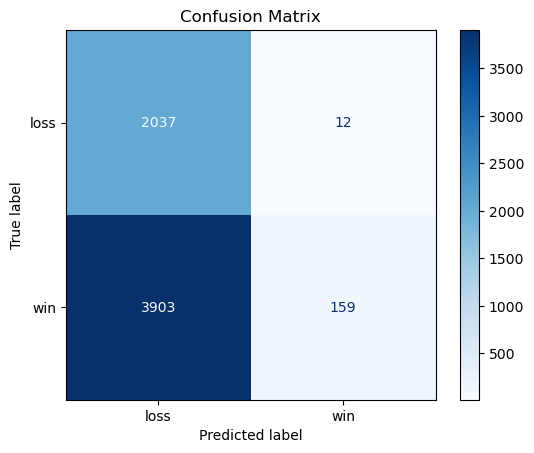

In [167]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Optional: Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')  # Use a colormap like 'Blues' for better visualization
plt.title("Confusion Matrix")
plt.show()

In [168]:
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
print("TPR: " + str(TPR))
print("TNR: " + str(TNR))

BER = 1 - 1/2 * (TPR + TNR)
print("BER: " + str(BER))

TPR: 0.03914327917282127
TNR: 0.9941434846266471
BER: 0.48335661810026576


In [169]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)

precision, recall

(0.9298245614035088, 0.03914327917282127)

In [170]:
F1 = 2 * (precision*recall) / (precision + recall)
F1

0.07512402551381998

In [ ]:
# Logistic Regression

In [22]:
mod = sklearn.linear_model.LogisticRegression(fit_intercept=False, C = 10, penalty = 'l2', solver = 'liblinear', class_weight = 'balanced', max_iter=1000)
mod.fit(X_train,y_train)

LogisticRegression(C=10, class_weight='balanced', fit_intercept=False,
                   max_iter=1000, solver='liblinear')

In [23]:
# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # 'liblinear' supports l1 and l2
    'class_weight': [None, 'balanced']
}

# Initialize and tune
logreg = sklearn.linear_model.LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

NameError: name 'GridSearchCV' is not defined

In [24]:
# Get the coefficients
coefficients = mod.coef_[0]  # For binary classification, the coefficients are in the first row

# Print coefficients and intercept
print("Coefficients:", coefficients)

Coefficients: [ 2.91854143e-02  5.22547655e-02  4.95543714e-01 -5.18613065e-01
 -1.53923044e-01  5.75822739e-01 -3.92714281e-01  5.50529657e-02
  3.82596936e-01 -4.08464487e-01 -2.11960601e-02  2.65919441e-01
 -2.15537966e-01  7.23077673e-02  9.61878036e-01 -1.00500039e+00
 -3.77988190e-01  2.25250542e+00 -1.84533181e+00  2.24035845e-01
 -1.00860446e-01 -9.39899852e-02 -1.23220923e-01 -8.92649270e-01
  1.04505561e+00  2.76182045e-01 -1.02018609e+00  7.73189463e-01
 -9.16154228e-02 -8.62075348e-01  9.82876185e-01 -9.99708635e-02
  5.14658067e-01 -3.85501790e-01 -1.32687555e-01  1.81857074e+00
 -1.65669777e+00  3.53597028e-01 -6.88130395e-01  3.63718781e-01
 -1.45581570e-01 -1.37907070e+00  1.55383769e+00  3.36072586e-01
 -2.26908812e+00  1.96220095e+00 -1.25232585e-01 -1.30196727e+00
  1.45638527e+00 -6.64206857e-02  1.27954247e-01 -3.23481470e-02
 -4.15697012e-02  1.53274375e+00 -1.46198863e+00 -1.43072365e-01
  1.46721486e-01  2.55362937e-02 -2.13647928e-01 -9.60307727e-01
  1.2031410

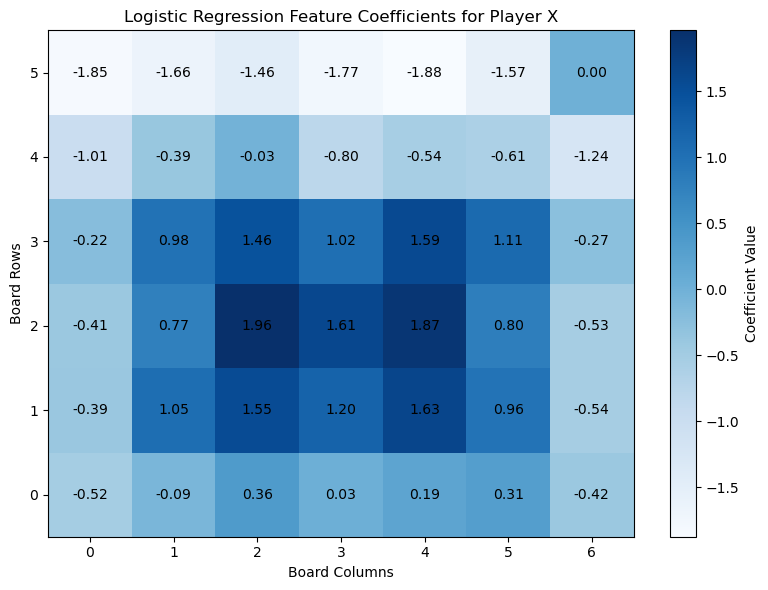

In [29]:
import numpy as np
# Initialize a 7x6 grid with zeros
coefs = coefficients[3:-5:3]

table = np.zeros((6, 7))

# Fill the table bottom-to-top, left-to-right across columns
col_index = 0  # Start at the first column
row_index = 5  # Start at the bottom row (index 5 for 6 rows)

for coef in coefs:
    table[row_index, col_index] = coef
    row_index -= 1  # Move up the column
    if row_index < 0:  # If the column is filled, move to the next column
        row_index = 5  # Reset to the bottom row
        col_index += 1  # Move to the next column

# Plot the 7x6 grid as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(table[::-1], cmap="Blues", aspect="auto")  # Reverse rows for top-to-bottom display
plt.colorbar(label="Coefficient Value")
plt.title("Logistic Regression Feature Coefficients for Player X")
plt.xlabel("Board Columns")
plt.ylabel("Board Rows")

# Add text annotations to each cell
for i in range(6):
    for j in range(7):
        plt.text(j, 5 - i, f"{float(table[i, j]):.2f}", ha="center", va="center", color="black")

plt.xticks(range(7))
plt.yticks(range(6))
plt.gca().invert_yaxis()  # Flip Y-axis to match Connect 4 layout
plt.grid(visible=False)
plt.tight_layout()
plt.show()

In [28]:
predictions = mod.predict(X_test) # Binary vector of predictions
correct = predictions == y_test # Binary vector indicating which predictions were correct
sum(correct) / len(correct)

0.8078874161348388

In [150]:
TP = sum([(p=='win' and l=='win') for (p,l) in zip(predictions, y_test)])
FP = sum([(p=='win' and l=='loss') for (p,l) in zip(predictions, y_test)])
TN = sum([(p=='loss' and l=='loss') for (p,l) in zip(predictions, y_test)])
FN = sum([(p=='loss' and l=='win') for (p,l) in zip(predictions, y_test)])

print("TP = " + str(TP))
print("FP = " + str(FP))
print("TN = " + str(TN))
print("FN = " + str(FN))

TP = 3401
FP = 513
TN = 1536
FN = 661


Confusion Matrix:
[[1536  513]
 [ 661 3401]]


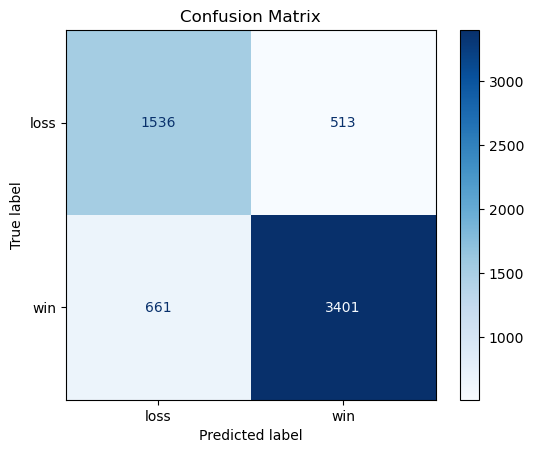

In [151]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Optional: Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')  # Use a colormap like 'Blues' for better visualization
plt.title("Confusion Matrix")
plt.show()

In [152]:
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
print("TPR: " + str(TPR))
print("TNR: " + str(TNR))

BER = 1 - 1/2 * (TPR + TNR)
print("BER: " + str(BER))

TPR: 0.8372722796651896
TNR: 0.7496339677891655
BER: 0.20654687627282242


In [153]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)

precision, recall

(0.8689320388349514, 0.8372722796651896)

In [154]:
F1 = 2 * (precision*recall) / (precision + recall)
F1

0.8528084252758275

In [ ]:
# SVM

In [131]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import accuracy_score

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']  # RBF kernel for non-linear relationships
}

model = SVC(kernel='rbf', C=40, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

In [132]:
accuracy

0.8715431189657994

In [ ]:
40 -> 0.8715431189657994

In [133]:
TP = sum([(p=='win' and l=='win') for (p,l) in zip(y_pred, y_test)])
FP = sum([(p=='win' and l=='loss') for (p,l) in zip(y_pred, y_test)])
TN = sum([(p=='loss' and l=='loss') for (p,l) in zip(y_pred, y_test)])
FN = sum([(p=='loss' and l=='win') for (p,l) in zip(y_pred, y_test)])

print("TP = " + str(TP))
print("FP = " + str(FP))
print("TN = " + str(TN))
print("FN = " + str(FN))

TP = 3665
FP = 388
TN = 1661
FN = 397


Confusion Matrix:
[[1661  388]
 [ 397 3665]]


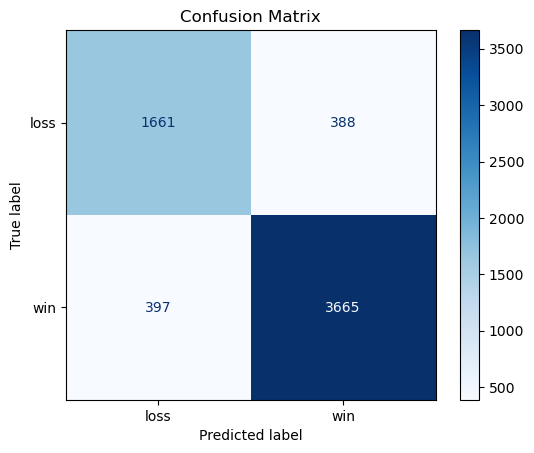

In [134]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Optional: Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')  # Use a colormap like 'Blues' for better visualization
plt.title("Confusion Matrix")
plt.show()

In [135]:
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
print("TPR: " + str(TPR))
print("TNR: " + str(TNR))

BER = 1 - 1/2 * (TPR + TNR)
print("BER: " + str(BER))

TPR: 0.9022648941408173
TNR: 0.810639336261591
BER: 0.14354788479879588


In [136]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)

precision, recall

(0.9042684431285467, 0.9022648941408173)

In [137]:
F1 = 2 * (precision*recall) / (precision + recall)
F1

0.9032655576093654

In [ ]:
# Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(max_depth = None, max_features = 'log2', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500, random_state=42)
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

In [121]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

Fitting 2 folds for each of 162 candidates, totalling 324 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   9.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   9.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1

[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   3.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   5.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=  12.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=  10.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.8s
[CV] END max_depth=10, max_features=

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=  12.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   5.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   5.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=  13.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=  12.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   3.8s
[CV] END max_depth=20, max_feature

[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   4.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   4.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=  10.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   9.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   2.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   2.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   4.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   4.1s
[CV] END max_depth=20, max_features=

[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  13.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  12.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   5.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  12.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  11.2s
[CV] END max_depth=None,

In [ ]:
# Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

In [125]:
accuracy

0.8206512845688103

In [126]:
TP = sum([(p=='win' and l=='win') for (p,l) in zip(y_pred, y_test)])
FP = sum([(p=='win' and l=='loss') for (p,l) in zip(y_pred, y_test)])
TN = sum([(p=='loss' and l=='loss') for (p,l) in zip(y_pred, y_test)])
FN = sum([(p=='loss' and l=='win') for (p,l) in zip(y_pred, y_test)])

print("TP = " + str(TP))
print("FP = " + str(FP))
print("TN = " + str(TN))
print("FN = " + str(FN))

TP = 3983
FP = 1017
TN = 1032
FN = 79


Confusion Matrix:
[[1032 1017]
 [  79 3983]]


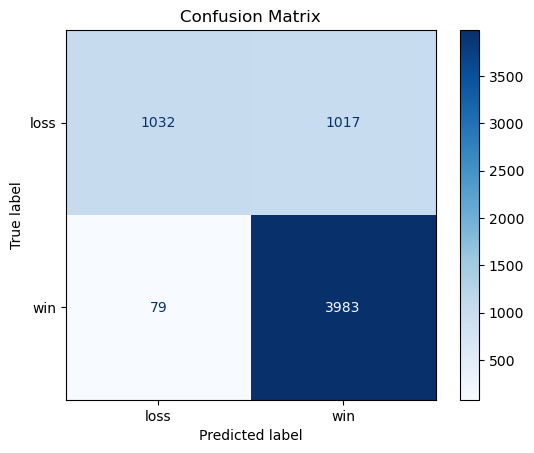

In [127]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Optional: Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')  # Use a colormap like 'Blues' for better visualization
plt.title("Confusion Matrix")
plt.show()

In [128]:
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
print("TPR: " + str(TPR))
print("TNR: " + str(TNR))

BER = 1 - 1/2 * (TPR + TNR)
print("BER: " + str(BER))

TPR: 0.9805514524864599
TNR: 0.5036603221083455
BER: 0.2578941127025973


In [129]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)

precision, recall

(0.7966, 0.9805514524864599)

In [130]:
F1 = 2 * (precision*recall) / (precision + recall)
F1

0.8790553961597882